In [1]:
import numpy as np #importing numpy.
import pandas as pd #importing pandas.
import matplotlib.pyplot as plt
from scipy.interpolate import splrep, splev
from scipy.ndimage.filters import gaussian_filter1d
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import numpy as np

In [2]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/05-05-2020.csv')

In [17]:
# (Always)
cols = confirmed_df.keys()
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]

# Korea (always)
Korea_cases = []
days = []
dates = confirmed.keys()
dateslist = list(dates)

# select country (depends) ##### Please check the data link for the (Country/Region) syntax or use your own data ####
for i in dates:
    Korea_cases.append(confirmed_df[confirmed_df['Country/Region']=='Korea, South'][i].sum())

# To do: Spain

# To do: ITaly


print(Korea_cases)

[1, 1, 2, 2, 3, 4, 4, 4, 4, 11, 12, 15, 15, 16, 19, 23, 24, 24, 25, 27, 28, 28, 28, 28, 28, 29, 30, 31, 31, 104, 204, 433, 602, 833, 977, 1261, 1766, 2337, 3150, 3736, 4335, 5186, 5621, 6088, 6593, 7041, 7314, 7478, 7513, 7755, 7869, 7979, 8086, 8162, 8236, 8320, 8413, 8565, 8652, 8799, 8961, 8961, 9037, 9137, 9241, 9332, 9478, 9583, 9661, 9786, 9887, 9976, 10062, 10156, 10237, 10284, 10331, 10384, 10423, 10450, 10480, 10512, 10537, 10564, 10591, 10613, 10635, 10653, 10661, 10674, 10683, 10694, 10708, 10718, 10728, 10738, 10752, 10761, 10765, 10774, 10780, 10793, 10801, 10804, 10806, 10810, 10822, 10840, 10874, 10909, 10936, 10962, 10991, 11018, 11037, 11050, 11065, 11078]


In [18]:
# print cases dates to see when to drop 
print(dateslist)

# starts at 22 - 1 = first case date (((no need to drop)) 
# if dropping needed use, 5 is based on the first case date: (depends)
# for i in range(0,5):
#     germany_cases.pop(0)
#     dateslist.pop(0)

['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/12/20', '4/13/20', '4/14/20', '4/15/20', '4/16/20', '4/17/20', '4/18/20', '4/19/20', '4/20/20', '4/21/20', '4/22/20', '4/23/20', '4/

In [19]:
# map dates to days (always)
for w in range(0,len(list(Korea_cases))):
    days.append(w)

print(len(list(dates)))
print(dateslist)

# (always)
column_names = ["cases", "Days", "Dates", 'Actions']
events = pd.DataFrame(columns = column_names)
events['Cases'] = Korea_cases
events['Days'] = days
events['Dates'] = dateslist
events['Actions'] = ''
evActions = list(events['Actions'])
z = 0

    
# TO DO: Change them (depends)   
ActionsDates = ['3/14/20','3/16/20','3/20/20','3/22/20']
ActionsValues = ['shuts down public gatherings','School shutdown','curfew in Bavaria','closesing nonessential bussniess']


118
['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/12/20', '4/13/20', '4/14/20', '4/15/20', '4/16/20', '4/17/20', '4/18/20', '4/19/20', '4/20/20', '4/21/20', '4/22/20', '4/23/20',

C:\Users\admin\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
No handles with labels found to put in legend.


shuts down public gatherings
School shutdown
curfew in Bavaria
closesing nonessential bussniess


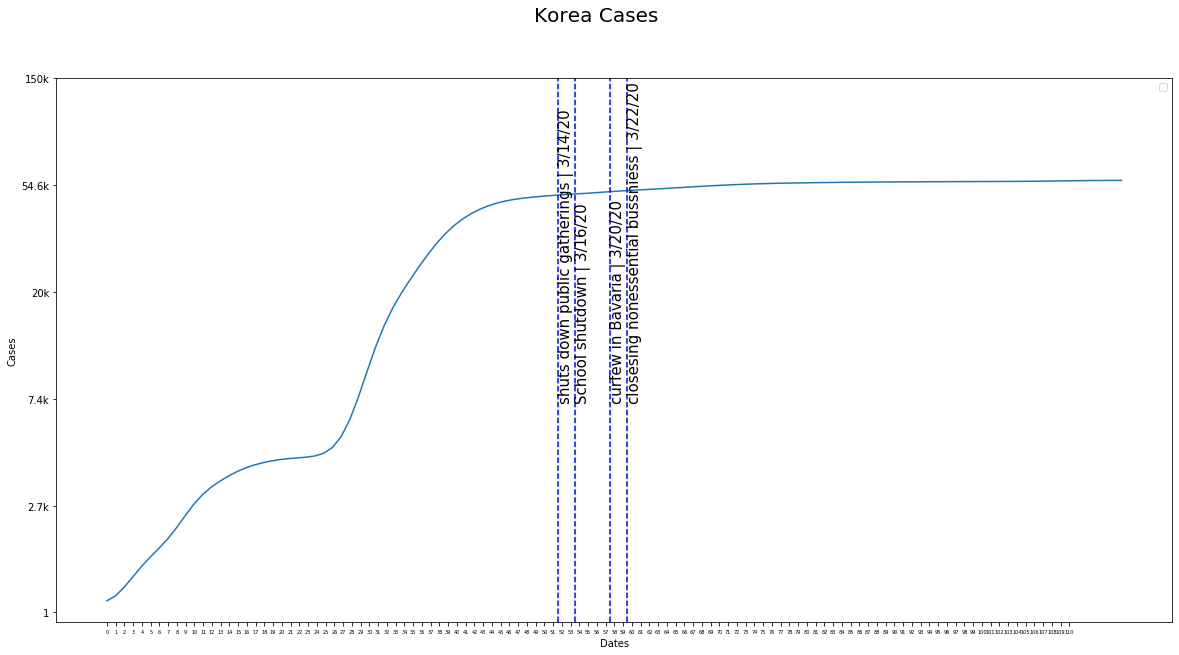

In [20]:

lis1 = []

# always
for w in ActionsDates:
    for x in range(0,len(list(events['Dates']))):
        if(events.Dates.iloc[x] == w):
            events.Actions.iloc[x] = ActionsValues[z]

    print(ActionsValues[z])
    z = 1 + z

# always
evDays = events['Days']
evActions = list(events['Actions'])
evdates = events['Dates']
plt.figure(figsize=(20, 10))
ysmoothed = gaussian_filter1d(np.log10(Korea_cases), sigma=2)
plt.plot(days, ysmoothed)
# depends 
plt.suptitle('Korea Cases', size=20)
# always 
plt.xlabel("Dates")
plt.ylabel("Cases")
plt.yticks([0,1,2,3,4,5], ['1','2.7k','7.4k','20k','54.6k','150k'])
x =  np.linspace(0, 111, num=111)
plt.xticks(x, days, size=5)
j=0
for x in evDays:
    if (evActions[j] != ''):
        plt.axvline(x,color='b',linestyle='dashed')
        plt.text(x,2,evActions[j] + " | " + str(evdates[j]),rotation=90,fontsize=15)
    j = j + 1

plt.legend()
plt.show()